In [1]:
using Plots
using CSV
using DataFrames
using StatsBase

## Sim Data  -> Low Variability

In [14]:
# sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0524_batch_00_00.csv"

sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/05_27_batch_00_01.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))
# sim_data[!, "x1"]

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.0e31
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.0e31
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,1.0e31
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.0e31
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.0e31
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,1.0e31
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,1.0e31
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.0e31
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.0e31


## History Data

In [3]:
hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))

# hist_data[!, "0"]

,0
,Float64
1,4.96949e10
2,4.85494e10
3,4.47668e10
4,4.49106e10
5,5.42743e10
6,4.16979e10
7,4.09721e10
8,4.14693e10
9,4.1515e10


In [ ]:
X = Matrix(dp_data)
Xg = X[:, Not(collect(bad_ix))]
yg = y[Not(collect(bad_ix))]


# drop bad values (from failed simulations) so that gp can fit better 
bad_ix = findall(x->x>10e5, y)
Xg = X[:, Not(collect(bad_ix))]
yg = y[Not(collect(bad_ix))]

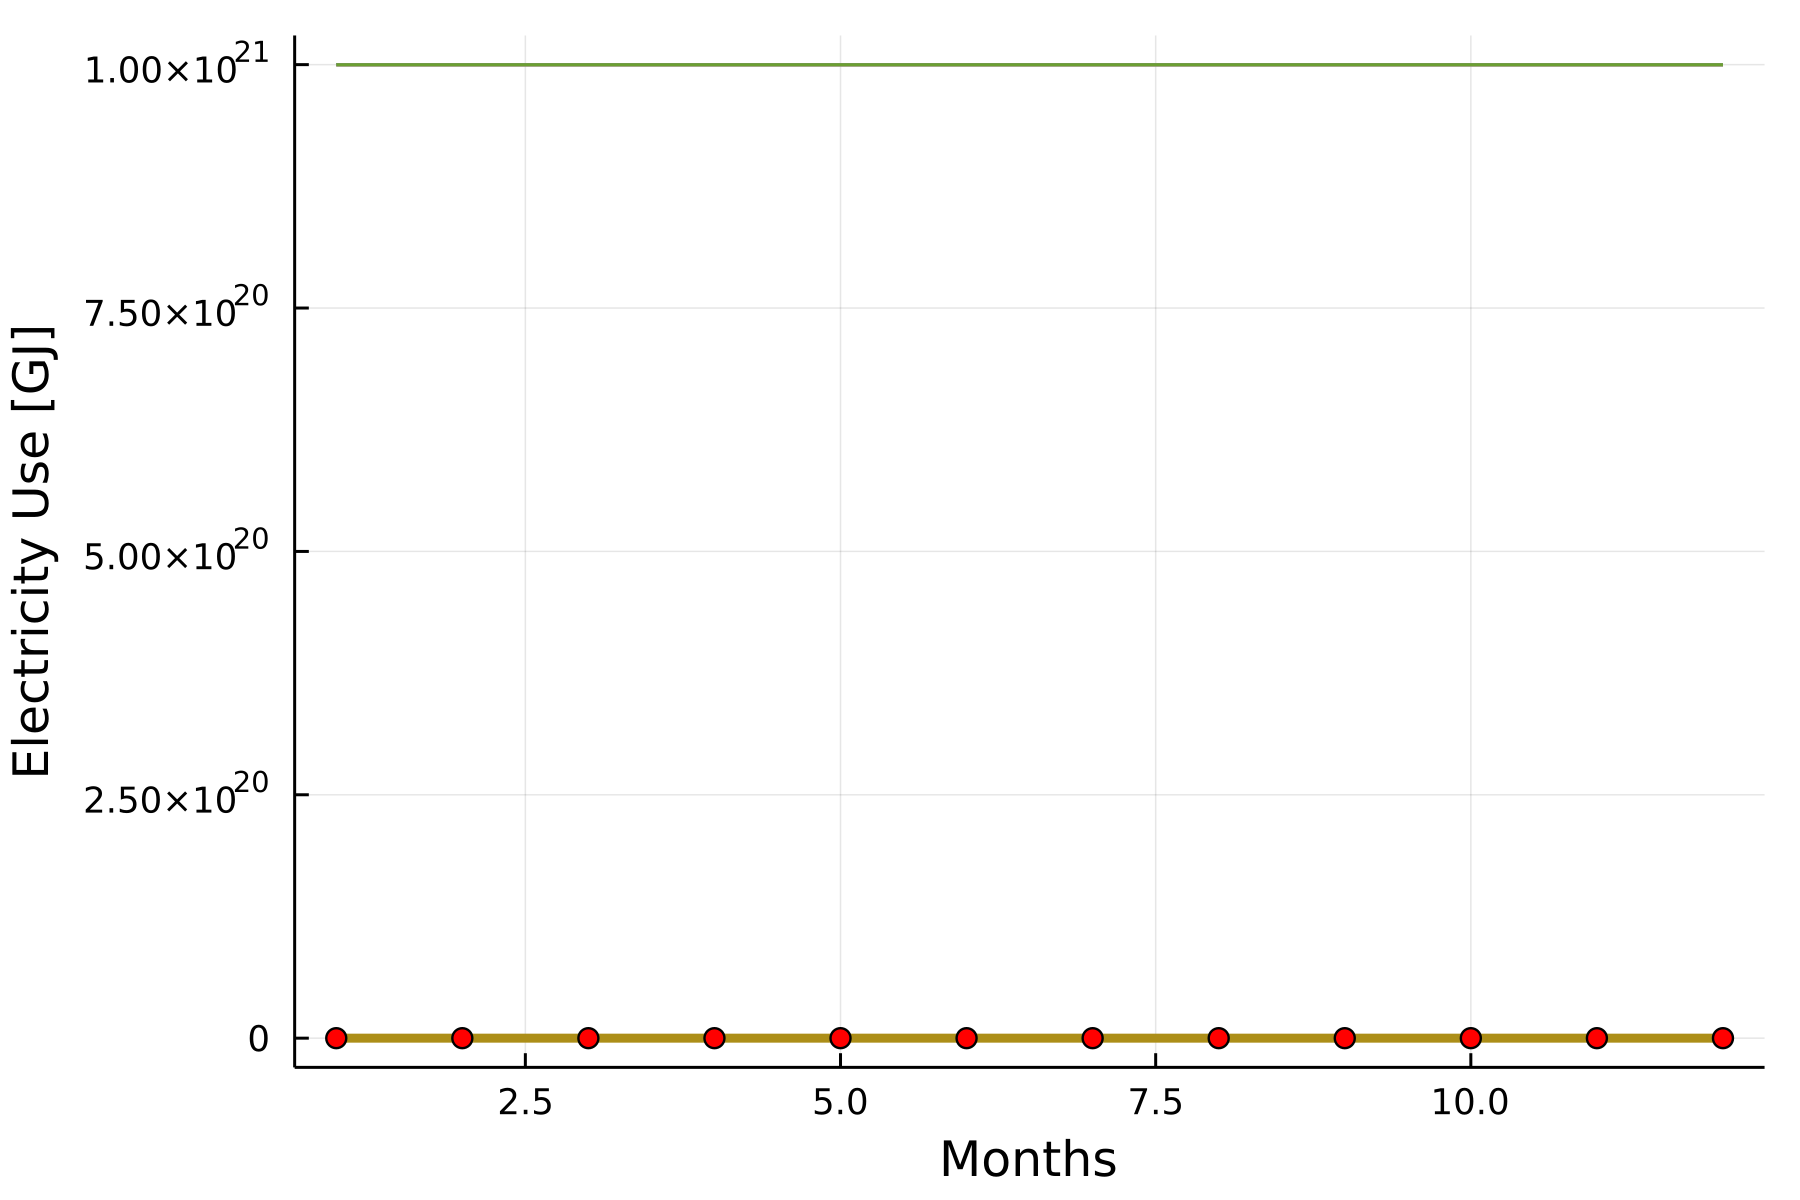

In [15]:
plot()
for i = 1:size(sim_data)[2]
    plot!(sim_data[!, "x$i"]./10e9, leg=false)
end

plot!(hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", xlabel="Months", ylabel="Electricity Use [GJ]", dpi=300)

# RMSE

In [5]:
Y = Matrix(sim_data)
h = Matrix(hist_data)

UndefVarError: UndefVarError: sim_data not defined

In [6]:
y = []
for i=1:size(Y,2)
    append!(y, rmsd(Y[:, i], h, normalize=false))
end
y

UndefVarError: UndefVarError: Y not defined

In [7]:
hgj = h./10e9 # GJ 

UndefVarError: UndefVarError: h not defined

In [8]:
Ygj = Y./10e9


UndefVarError: UndefVarError: Y not defined

In [9]:
ygj = []
for i=1:size(Ygj,2)
    append!(ygj, rmsd(Ygj[:, i], hgj, normalize=false))
end
ygj

UndefVarError: UndefVarError: Ygj not defined

# Plot in GJ

In [10]:


for i = 1:10
    plot!(sim_data[!, "x$i"]./10e9, leg=false)
end

plot!(hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [GJ]")



UndefVarError: UndefVarError: sim_data not defined

# Sensitivity Analysis

In [11]:
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0525_batch_00_01.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.69693e9
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,2.10339e9
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.70583e9
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.71028e9
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,2.011e9
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,1.60914e9
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.8101e9
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.81005e9


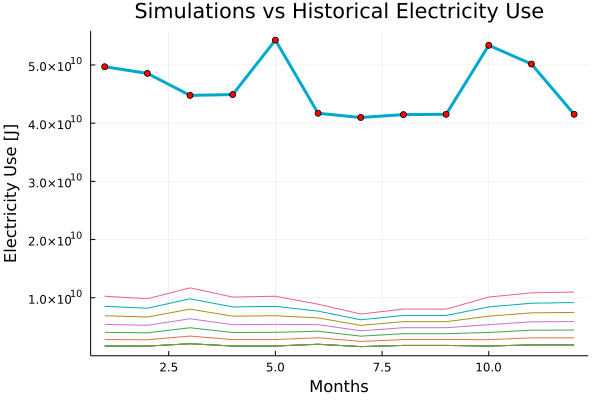

In [12]:
for i = 1:10
    plot!(sim_data[!, "x$i"], leg=false)
end

plot!(hist_data[!, "0"], linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [J]")